# Pattern Recognision and Machine Learning
By **Tzanetis Savvas**(10889) and **Zoidis Vasilis**(10652).

## Part A1
In the first part of the assignment we will estimate the parameters $θ_1$ and $θ_2$ using **Maximum Likelihood Estimation** as well as visualize $\log(p(D1|θ))$ and $\log(p(D2|θ))$ as functions of **$\theta$**.

First things first, we need to import any nessecary libraries to our project like **numpy** for mathematical operations and **matplotlib** for displaying graphs and results.

In [72]:
import numpy as np
import matplotlib.pyplot as plt


In this code, **D1** will hold the training dataset showing **no stress** ( $ω_1$ ) and **D2** the training dataset showing **stress** ( $ω_2$ ).

In [73]:
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])  # ω1: no stress
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])          # ω2: stress

Given the **PDF** function for the indicator $x$:
$$ p(x|θ) = \frac{1}{π(1+(x-θ)^2)} $$

Which also happens to be the **Cauchy distribution** for **$x$** given **$θ$**, we can caluclate the **log-likelyhood** function for a dataset **$D$** like so:
$$ \log(p(D|θ) = \sum_{x \in D} \log \left( \frac{\pi}{1 + (x - \theta)^2} \right) $$
The reason we are using a log-likelyhood instead of a regular likelyhood function is because the logarithms simplify the computation needed by converting products into sums, and since logarithms are also monotonic functions, maximazing the log-likelyhood $\log{L(\theta|D)}$ is equivalent to maximizing the likelyhood $L(\theta|D)$.

This can be achieved in the code by declearing a **log_likelyhood** function.

In [74]:
def log_likelihood(D, theta):
    return -len(D) * np.log(np.pi) - np.sum(np.log(1 + (D[:, None] - theta)**2), axis = 0)

In order to Estimate the $\hat{\theta}_1$ and $\hat{\theta}_2$ values, we need to define a range of $\theta$ values that will likely contain the actual $\theta$. Since the data range spans between $[-4.5, 4.1]$, we just need to select a wider candidate range for $\theta$. We will be using $[-6, 6]$.

Lastly, in order to visualize our results, we need to define the previously selected range of candidate **$\theta$** values in our code, compute the values $\log(p(D1|θ))$ and $\log(p(D2|θ))$ as well as $\hat{\theta}_1$ and $\hat{\theta}_2$, and plot the results using the **matplotlib** library.

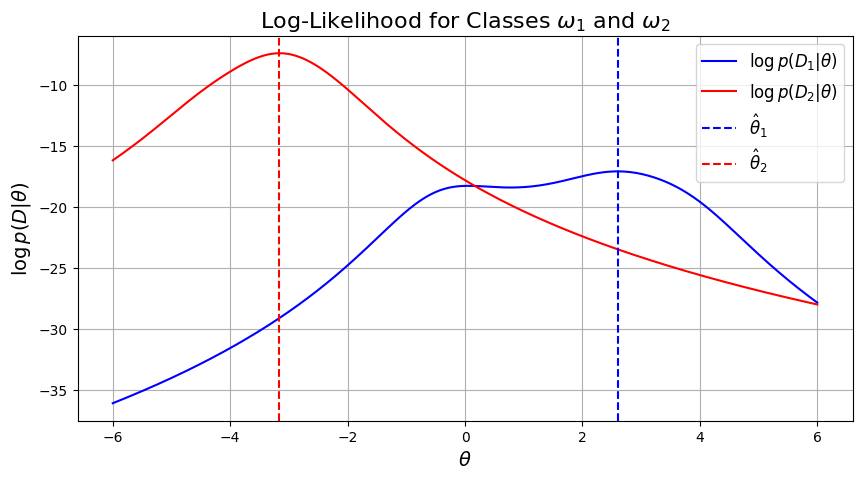

Estimated θ1 (no stress): 2.61
Estimated θ2 (stress): -3.16


In [75]:
theta_range = np.linspace(-6, 6, 500)
log_p_D1 = log_likelihood(D1, theta_range)
log_p_D2 = log_likelihood(D2, theta_range)

theta_hat_1 = theta_range[np.argmax(log_p_D1)]
theta_hat_2 = theta_range[np.argmax(log_p_D2)]

plt.figure(figsize=(10, 5))
plt.plot(theta_range, log_p_D1, label=r'$\log p(D_1|\theta)$', color='blue')
plt.plot(theta_range, log_p_D2, label=r'$\log p(D_2|\theta)$', color='red')
plt.axvline(theta_hat_1, color='blue', linestyle='--', label=r'$\hat{\theta}_1$')
plt.axvline(theta_hat_2, color='red', linestyle='--', label=r'$\hat{\theta}_2$')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\log p(D|\theta)$', fontsize=14)
plt.title('Log-Likelihood for Classes $\\omega_1$ and $\\omega_2$', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

print(f"Estimated θ1 (no stress): {theta_hat_1:.2f}")
print(f"Estimated θ2 (stress): {theta_hat_2:.2f}")

## Part A2
Here we are tasked with classifying the two datasets $D_1$ and $D_2$, using the discriminant function:
$$ g(x) = \log{P(x|\hat{\theta}_1)} - \log{P(x|\hat{\theta}_2)} + \log{P(\omega_1)} - \log{P(\omega_2)} $$

In [76]:
P1 = 7/12
P2 = 5/12

def predict(x, theta1, theta2, P1, P2):
    log_p1 = -np.log(1 + (x - theta1)**2)
    log_p2 = -np.log(1 + (x - theta2)**2)
    prior_ratio = np.log(P1 / P2)
    return log_p1 - log_p2 + prior_ratio

And after plotting $g(x)$:

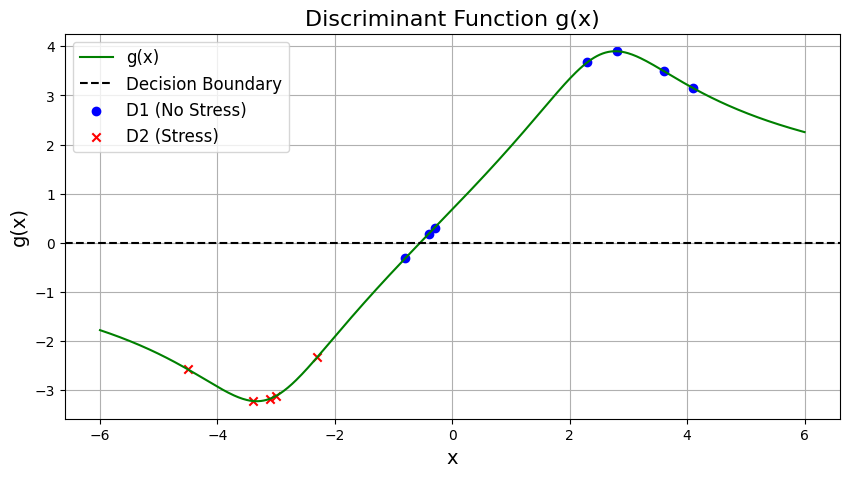

In [77]:
x_range = np.linspace(-6, 6, 500)
g_values = predict(x_range, theta_hat_1, theta_hat_2, P1, P2)

g_D1 = predict(D1, theta_hat_1, theta_hat_2, P1, P2)
g_D2 = predict(D2, theta_hat_1, theta_hat_2, P1, P2)

plt.figure(figsize=(10, 5))
plt.plot(x_range, g_values, label='g(x)', color='green')
plt.axhline(0, color='black', linestyle='--', label='Decision Boundary')
plt.scatter(D1, g_D1, color='blue', label='D1 (No Stress)', marker='o')
plt.scatter(D2, g_D2, color='red', label='D2 (Stress)', marker='x')
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.title('Discriminant Function g(x)', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

### Decision Rule
The decision boundary is $g(x) = 0$. More specifically:
- Points that are above the decision boundary ( $g(x) > 0$ ) are classified as $\omega_1$ (no stress).
- Points that are below the decision boundary ( $g(x) < 0$ ) are classified as $\omega_2$ (stress).
### Observations
The classification rule leads us to having some misclassifications. Even though these misclassifications exist, the desicion rule works well enough, classifying correctly almost all values **( 11 out of 12)**. More specifically:
- 11 out of 12 values of the $D_1$ dataset are classified correctly.
- All of the values of the $D_2$ dataset are classified correctly.

We should avoid to further improve our model, as trying to do so may lead us to **overfitting**, preventing our model to generalize and classify correclty unseen cases.


## Part Β1
In this second part of the assignment we will estimate the parameter $theta$ using **Bayesian estimation method**. 

We declare the **Probability Density Function** of $\theta$ like so:
$$
p(\theta) = \frac{1}{10\pi \left( 1 + \left(\frac{\theta}{10}\right)^2 \right)}
$$

In [78]:
# Probability density function (prior)
def prior(theta):
    return 1 / (10 * np.pi * (1 + (theta / 10)**2))

And calculate the a posteriori probability of **$\theta$**, **$P(\theta|D)$**:
$$
p(\theta|D_1)=\frac{p(\theta|D_1)p(\theta)}{\int_{-\infty}^{\infty} p(\theta|D_1)p(\theta) \, d\theta}
$$

In [79]:
# Calculating the posterior probability
def posterior(D, theta):
    log_prior = np.log(prior(theta))
    log_likelihood_D = log_likelihood(D, theta)
    log_posterior = log_prior + log_likelihood_D
    return np.exp(log_posterior - np.max(log_posterior))  # Normalization

##### Ploting **$P(\theta|D_1)$** and **$P(\theta|D_2)$**:

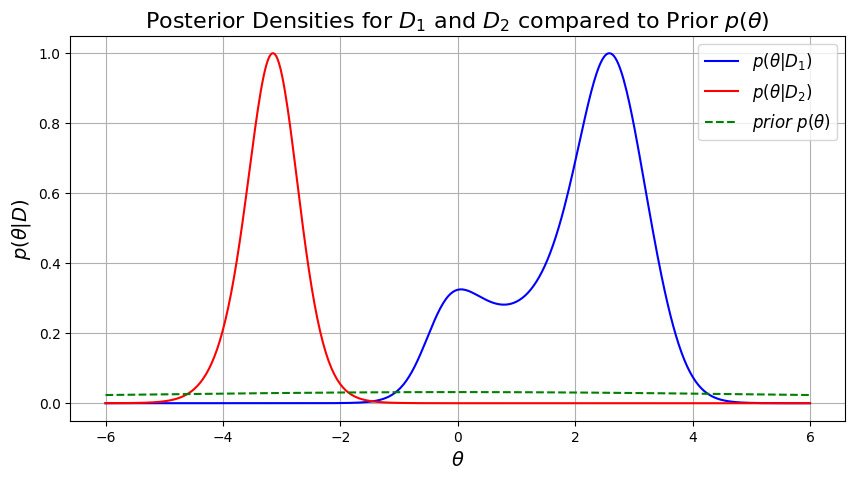

In [80]:
theta_range = np.linspace(-6, 6, 500)
posterior_D1 = posterior(D1, theta_range)
posterior_D2 = posterior(D2, theta_range)

# Visualization of posterior probability densities
plt.figure(figsize=(10, 5))
plt.plot(theta_range, posterior_D1, label=r'$p(\theta|D_1)$', color='blue')
plt.plot(theta_range, posterior_D2, label=r'$p(\theta|D_2)$', color='red')
plt.plot(theta_range, prior(theta_range), label=r'$prior~p(\theta)$', color='green', linestyle='--')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$p(\theta|D)$', fontsize=14)
plt.title('Posterior Densities for $D_1$ and $D_2$ compared to Prior $p(θ)$', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

### Observations  
- The prior distribution $p(\theta)$ is broad and evenly distributed across the range of $\theta$ values, indicating little preference for any particular $\theta$.
- The posteriors distributions are much more concentrated compared to the prior distribution, showing how the data refines the prior belief and provides more accurate estimates of  $p(\theta)$.
- The location of the peaks in the posterior distributions $p(\theta|D_1)$ and $p(\theta|D_2)$ highlight the impact of the datasets $D_1$ and $D_2$, respectively.

## Part Β2
We are tasked to classify the two datasets using **this discriminant function**:
$$ h(x) = \log{P(x|D_1)} - \log{P(x|D_2)} + \log{P(\omega_1)} - \log{P(\omega_2)} $$
In order to implement this, we declare this **posterior predictive distribution** ${P(x|D)}$ with the help of the trapezoid rule:
$$
P(x|D)={\int p(x|\theta)p(\theta|D) \, d\theta}
$$

In [81]:
def pdf(x, theta):
    return 1 / (np.pi*(1 + (x-theta)**2))

def posterior_predictive(x, D, x_values):
    posterior_x = posterior(D, x_values)
    integrand = [pdf(x, theta)*posterior_x[i] for i, theta in enumerate(x_values)]
    return np.trapezoid(integrand, x_values)

Now we can implement **the discriminant function**:
$$ h(x) = \log{P(x|D_1)} - \log{P(x|D_2)} + \log{P(\omega_1)} - \log{P(\omega_2)} $$

In [82]:
# Discrimination function
def predict(x, D1, D2, x_values, P1, P2):
    p_x_given_D1 = posterior_predictive(x, D1, x_values)
    p_x_given_D2 = posterior_predictive(x, D2, x_values)
    return np.log(p_x_given_D1) - np.log(p_x_given_D2) + np.log(P1) - np.log(P2)

**Plotting $h(x)$**:

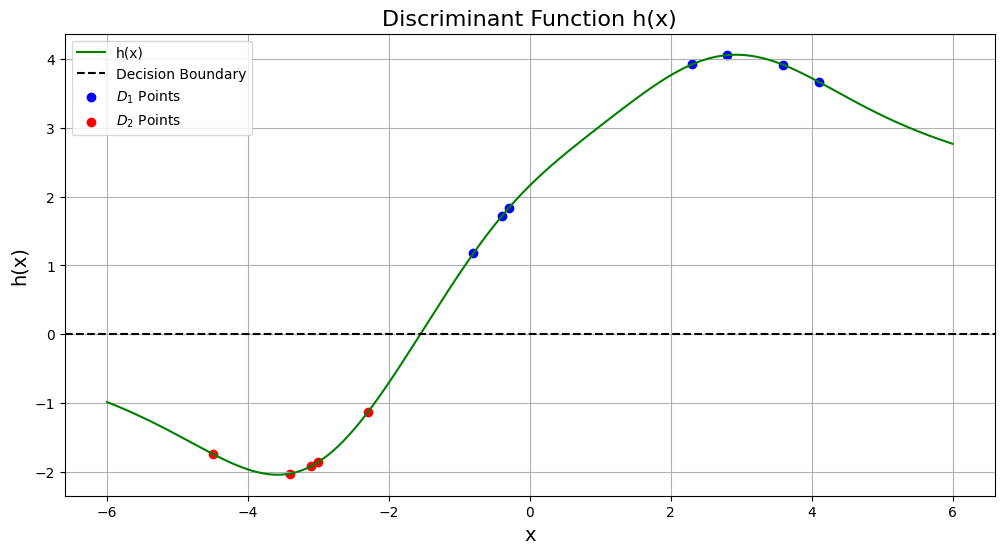

In [83]:

x_values = np.linspace(-6, 6, 500)
h_values = [predict(x, D1, D2, x_values, P1, P2) for x in x_values]
d1_values = [predict(x, D1, D2, x_values, P1, P2) for x in D1]
d2_values = [predict(x, D1, D2, x_values, P1, P2) for x in D2]

plt.figure(figsize=(12, 6))
plt.plot(x_values, h_values, label='h(x)', color='green')
plt.axhline(0, color='black', linestyle='--', label='Decision Boundary')
plt.scatter(D1, d1_values, color="blue", label=r"$D_1$ Points")
plt.scatter(D2, d2_values, color="red", label=r"$D_2$ Points")
plt.title('Discriminant Function h(x)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('h(x)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Observations  
- The **decision boundary** is at **$h(x)=0$**.
- All the points of **$D_1$** are classified correctly above the **decision boundary**
- All the points of **$D_2$** are classified correctly below the **decision boundary**

#### How do we evaluate the **Bayesian Parameter** estimation method (that we used in Part B) in relation to the **Maximum Likelihood** method (that we used in Part A) for **this specific** example?  
In this specific example, the Bayesian Parameter estimation method is preferred over the Maximum Likelihood method, since it classifies the data with **100%** accuracy, as opposed to the Maximum Likelihood approach **91.7%**.  

Most likely, this discrepancy is due to the fact that in part B we have **prior knowledge** about the **Probability Density Function** of parameter $\theta$.

## Part C1


#### We are tasked to train a Decision Tree Classifier on three specific iris species using the sepal length and width of the plant.

- to load the iris dataset we use **sklearn.datasets**.
- to split the dataset into a training and a testing set we use **sklearn.model_selection**.
- to implement the Decision Tree Classifier we use **sklearn.tree**.
- to evaluate the accuracy of our predictions we use **sklearn.metrics**.

In [84]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

First, we **load** the Iris dataset and **isolate** only the first two features. Then we **split** the dataset into a training and a testing set **(50% - 50%)** and **define** random state in order to ensure reproducibility.

In [85]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # We only use the first two features
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


Subsequently, we **train** the Decision Tree Classifier and **evaluate** its performance for **various** depths.

In [86]:
# Training the DecisionTreeClassifier and evaluating its performance.
best_depth = 0
best_accuracy = 0
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"We conclude that the optimal depth is {best_depth} with {best_accuracy * 100:.2f}% accuracy.")

We conclude that the optimal depth is 3 with 78.67% accuracy.


Τherefore, we **train** the best model:

In [87]:
# Training the best model
clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

And **plot** the results:

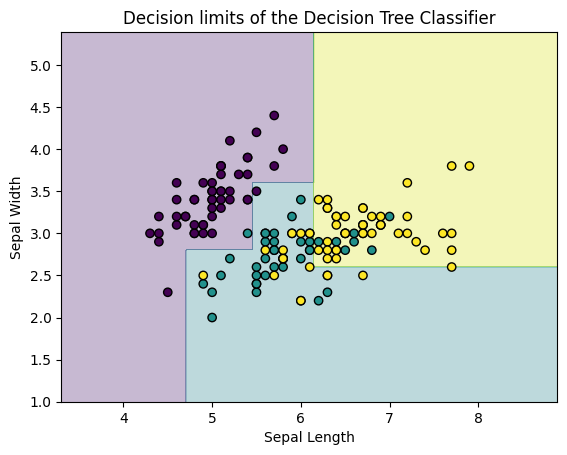

In [88]:
# Visualization of decision limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision limits of the Decision Tree Classifier')
plt.show()

## Part C2

#### We are tasked to **create** 100 new training sets from 50% of the original training set each time and **train** a Random Forest classifier with 100 trees using the **Bootstrap** technique.

- To implement the Random Forest Classifier we use **sklearn.ensemble**.

In [89]:
from sklearn.ensemble import RandomForestClassifier

First, we will need to create the **100 samples** for the Bootstrap technique.

In [90]:
# Creating 100 samples using the Bootstrap technique from the training set
n_trees = 100
sample_size = int(0.5 * len(X_train))  # γ = 50% of the total
forest_predictions = []

Now, we **train** the Random Forest Classifier and **evaluate** its performance for **various** depths.

In [91]:
for max_depth in range(1, 11):  # testing various  depths
    rf_clf = RandomForestClassifier(n_estimators=n_trees, max_depth=max_depth, bootstrap=True, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_forest = rf_clf.predict(X_test)
    forest_predictions.append((max_depth, accuracy_score(y_test, y_pred_forest)))

best_depth, best_accuracy = max(forest_predictions, key=lambda x: x[1])
print(f"We conclude that the optimal depth is {best_depth} with {best_accuracy * 100:.2f}% accuracy.")

We conclude that the optimal depth is 2 with 82.67% accuracy.


Finally, we can decide on the **best** one and **plot** the results:

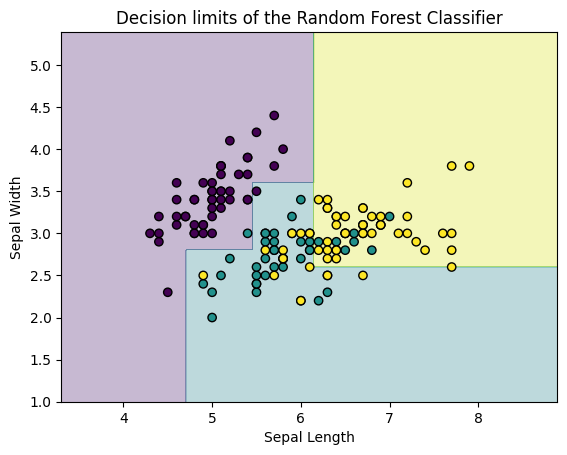

In [92]:
# Boundary decision for the best Random Forest
best_rf = RandomForestClassifier(n_estimators=n_trees, max_depth=best_depth, bootstrap=True, random_state=42)
best_rf.fit(X_train, y_train)

# Visualization of decision limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision limits of the Random Forest Classifier')
plt.show()


### Observations  
We remark that the **Random Forest Classifier** slightly outperforms the **Decision Tree Classifier**. More specifically we observe a **5% improvement** in terms of accuracy. This discrepancy is due to the nature of Decision Trees, which create **rough decision boundaries** (hard splits) and often result in **overfitting** to the training data. In contrast, Random Forests produce **smoother decision boundaries** and **less overfitting** because they **average** the predictions from multiple trees. This has the effect of mitigating the overfitting typically seen in a single Decision Tree and enabling **better generalization**.

#### How does the **percentage $\gamma$** affect the performance of the algorithm?

We test the Random Forest with **different values of $\gamma$**.

In [93]:
# Testing the Random Forest with different values of γ
for gamma in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    sample_size = int(gamma * len(X_train))
    rf_clf = RandomForestClassifier(n_estimators=n_trees, max_depth=best_depth, max_samples=gamma, random_state=42)
    rf_clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
    print(f"Accuracy with γ={gamma * 100:.0f}%: {accuracy * 100:.2f}%")


Accuracy with γ=10%: 80.00%
Accuracy with γ=20%: 80.00%
Accuracy with γ=30%: 81.33%
Accuracy with γ=40%: 82.67%
Accuracy with γ=50%: 82.67%
Accuracy with γ=60%: 82.67%
Accuracy with γ=70%: 82.67%
Accuracy with γ=80%: 82.67%
Accuracy with γ=90%: 82.67%
Accuracy with γ=100%: 82.67%


#### The influence of $\gamma$:

From the analysis, we observe that for **lower $\gamma$ values** (0.1, 0.2, 0.3) the accuracy varies between **0.80** and **0.81**, showing slight improvements as $\gamma$ increases. For **higher values** (0.4 and above), accuracy **stabilizes** around **0.83**,  suggesting diminishing returns in performance improvement with increasing $\gamma$.  
In general, **smaller $\gamma$ values** result in **higher bias** because each bootstrap set includes less information about the entire dataset. Conversely, **larger $\gamma$ values** reduce diversity among the bootstrap sets, which can **limit the ensemble's ability to mitigate variance** effectively.

In summary, increasing $\gamma$ **up to 0.4 enhances** the algorithm's performance, but **further increases have no significant impact** on accuracy.